Importando a base de dados novamente:

In [1]:
import pandas as pd

url_dados = "alura/dados/dados_experimentos.zip"

dados = pd.read_csv(url_dados, compression="zip")
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Renomeando a coluna `droga` para `composto`

In [2]:
dados.rename(
    columns={"droga": "composto"},
    inplace=True
)

dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

Importando o Seaborn e plotando o primeiro gráfico:

<AxesSubplot:xlabel='composto', ylabel='count'>

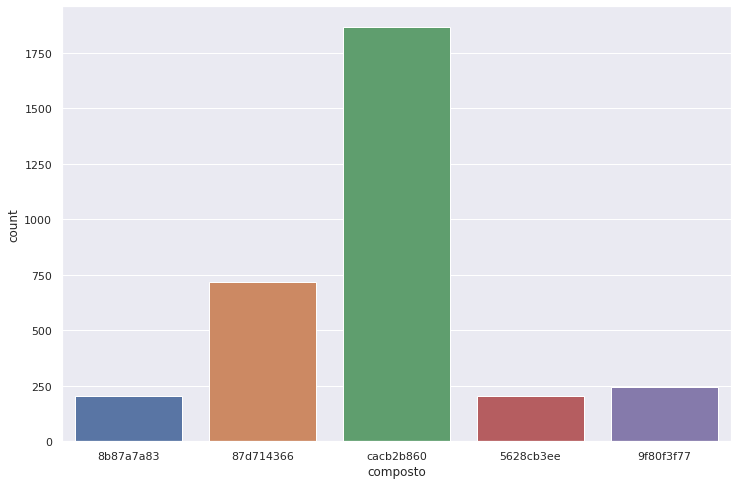

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

compostos = dados["composto"].value_counts().index[0:5]

plt.figure(figsize=(12, 8))
sns.countplot(data=dados.query('composto in @compostos'), x="composto")

**Desafio**: ordenar gráfico anterior.

<AxesSubplot:xlabel='composto', ylabel='count'>

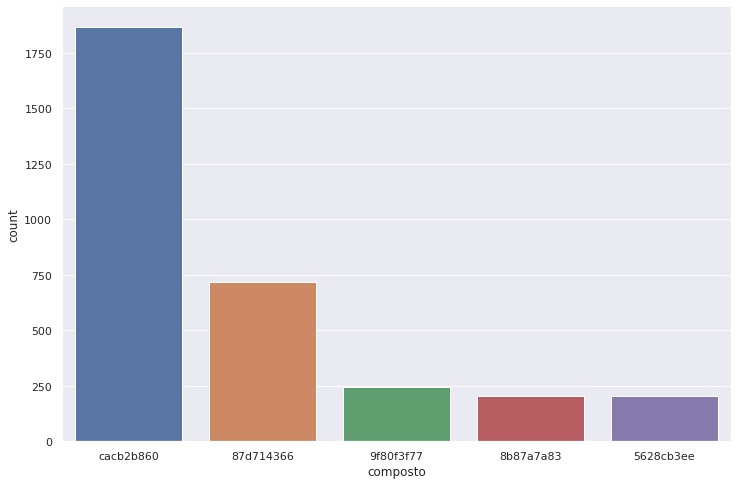

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(
    data=dados.query('composto in @compostos'),
    x="composto",
    order=compostos
)

Colocando título:

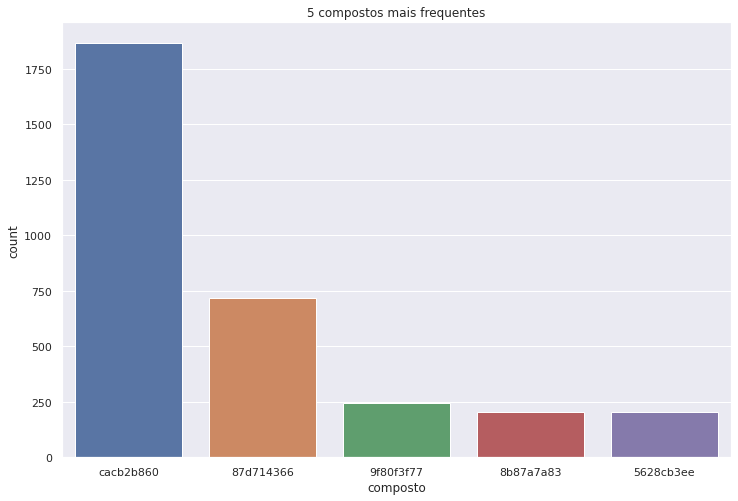

In [5]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=dados.query('composto in @compostos'),
    x="composto",
    order=compostos
)
ax.set_title("5 compostos mais frequentes")

plt.show()

**Desafio**: melhorar a visualização do gráfico (aumentar fontes, melhorar descrições, etc.).

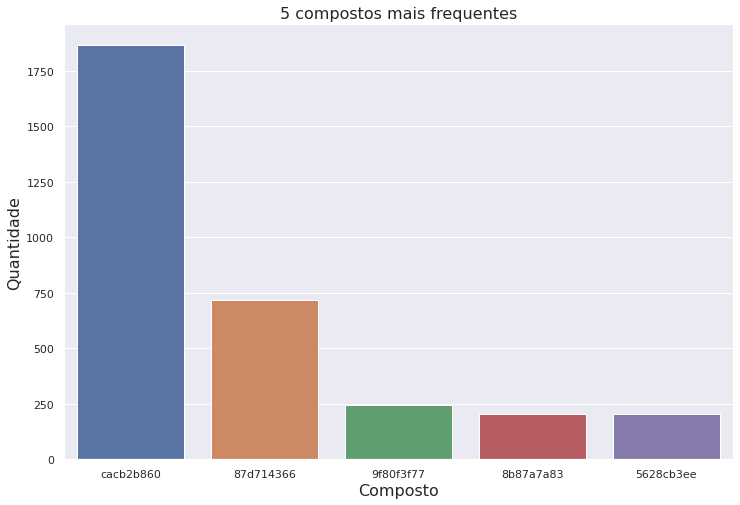

In [6]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=dados.query('composto in @compostos'),
    x="composto",
    order=compostos
)
ax.set_title("5 compostos mais frequentes", fontsize=16)
ax.set_xlabel("Composto", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)

plt.show()

Coletando uma descrição rápida dos dados:

In [7]:
dados['g-0'].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g-0, dtype: float64

Plotando um histograma:

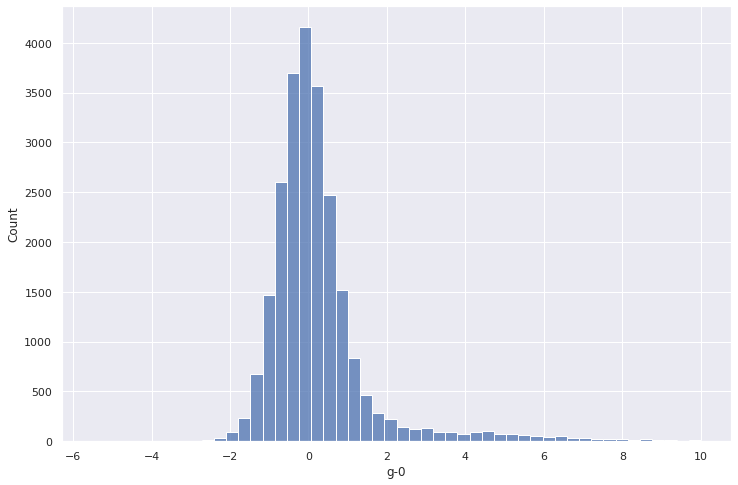

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(dados['g-0'], bins=50)

plt.show()

Plotando o histograma das médias, dos mínimos e dos máximos das colunas que começam com "g".

/home/juan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


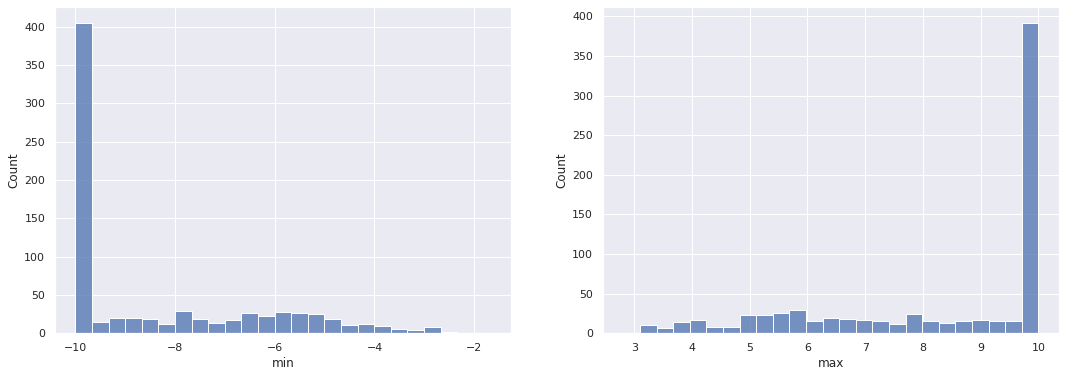

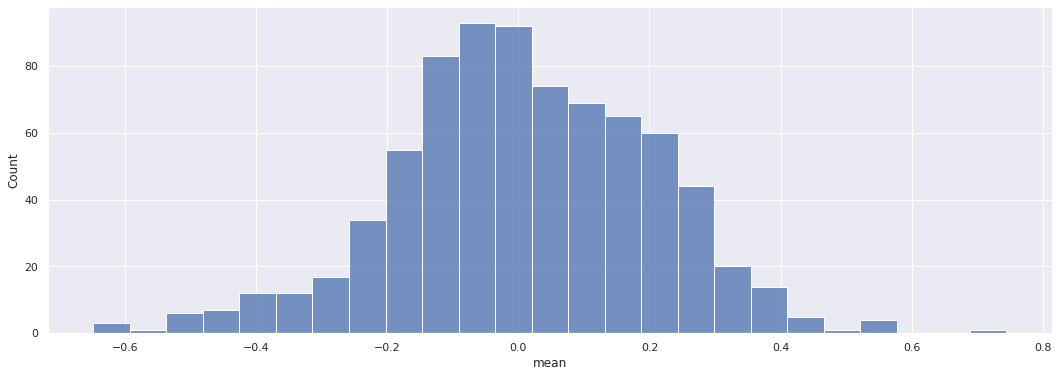

In [11]:
dados_g = dados.loc[:, 'g-0':'g-771'].describe().T

fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

sns.histplot(dados_g['min'], bins=25, ax=axes[0])
sns.histplot(dados_g['max'], bins=25, ax=axes[1])

fig.show()

plt.figure(figsize=(18, 6))
sns.histplot(dados_g['mean'], bins=25, )

plt.show()